In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# <p style="background-color:lightgray; font-family:verdana; font-size:250%; text-align:center; border-radius: 15px 20px;">🟠Sleep Efficiency Dataset|EDA🟠</p>

<a id="table"></a>
<h1 style="background-color:lightgray;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Table Of Content</h1>

* [1. IMPORTING LIBRARIES](#1)
    
* [2. LOADING DATASET](#2)
  
* [3. EXPLORATORY SOME INFORMATION ABOUT DATASET](#3)

* [4. DATA VISUALIZATION](#4)

* [5. AUTHOR MESSAGE](#5)


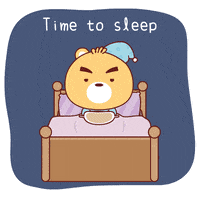

 <span style="color:orange;font-family:serif; font-size:28px;"> Let's get started! </span>

<a id="1"></a>
# <p style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">IMPORTING LIBRARIES</p>

In [26]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt
import missingno as msno
import plotly.graph_objs as go
import plotly.express as px
plt.style.use('seaborn-dark')
plt.style.context('grayscale')
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

<a id="2"></a>
# <p style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">LOADING DATASET</p>

In [27]:
df=pd.read_csv("Sleep_Efficiency.csv")

<a id="3"></a>
# <p style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">EXPLORATORY SOME INFORMATION ABOUT DATASET</p>

In [28]:
df.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration (hrs),Sleep efficiency (%),REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption (ml),Alcohol consumption (days per week),Smoking status,Exercise frequency (days per week)
0,1,65,Female,06-03-2021 01:00,06-03-2021 07:00,6.0,0.88,18,70,12,0.0,0.0,0,Yes,3.0
1,2,69,Male,05-12-2021 02:00,05-12-2021 09:00,7.0,0.66,19,28,53,3.0,0.0,3,Yes,3.0
2,3,40,Female,25-05-2021 21:30,25-05-2021 05:30,8.0,0.89,20,70,10,1.0,0.0,0,No,3.0
3,4,40,Female,03-11-2021 02:30,03-11-2021 08:30,6.0,0.51,23,25,52,3.0,50.0,5 (glasses),Yes,1.0
4,5,57,Male,13-03-2021 01:00,13-03-2021 09:00,8.0,0.76,27,55,18,3.0,0.0,3,No,3.0


In [29]:
df.isnull().sum()

ID                                      0
Age                                     0
Gender                                  0
Bedtime                                 0
Wakeup time                             0
Sleep duration (hrs)                    0
Sleep efficiency (%)                    0
REM sleep percentage                    0
Deep sleep percentage                   0
Light sleep percentage                  0
Awakenings                             20
Caffeine consumption (ml)              25
Alcohol consumption (days per week)    14
Smoking status                          0
Exercise frequency (days per week)      6
dtype: int64

In [30]:
df.rename(columns = {'Wakeup time':'Wakeup_time', 'Sleep duration':'Sleep_duration ',"Sleep efficiency":"Sleep_efficiency",
                     "REM sleep percentage":"REM_sleep_percentage","Deep sleep percentage":"Deep_sleep_percentage",
                     "Light sleep percentage":"Light_sleep_percentage","Caffeine consumption":"Caffeine_consumption",
                     "Alcohol consumption":"Alcohol_consumption","Smoking status":"Smoking_status","Exercise frequency":"Exercise_frequency"}, inplace = True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   452 non-null    int64  
 1   Age                                  452 non-null    int64  
 2   Gender                               452 non-null    object 
 3   Bedtime                              452 non-null    object 
 4   Wakeup_time                          452 non-null    object 
 5   Sleep duration (hrs)                 452 non-null    float64
 6   Sleep efficiency (%)                 452 non-null    float64
 7   REM_sleep_percentage                 452 non-null    int64  
 8   Deep_sleep_percentage                452 non-null    int64  
 9   Light_sleep_percentage               452 non-null    int64  
 10  Awakenings                           432 non-null    float64
 11  Caffeine consumption (ml)       

In [32]:
df.head()

,ID,Age,Gender,Bedtime,Wakeup_time,Sleep duration (hrs),Sleep efficiency (%),REM_sleep_percentage,Deep_sleep_percentage,Light_sleep_percentage,Awakenings,Caffeine consumption (ml),Alcohol consumption (days per week),Smoking_status,Exercise frequency (days per week)
0,1,65,Female,06-03-2021 01:00,06-03-2021 07:00,6.0,0.88,18,70,12,0.0,0.0,0,Yes,3.0
1,2,69,Male,05-12-2021 02:00,05-12-2021 09:00,7.0,0.66,19,28,53,3.0,0.0,3,Yes,3.0
2,3,40,Female,25-05-2021 21:30,25-05-2021 05:30,8.0,0.89,20,70,10,1.0,0.0,0,No,3.0
3,4,40,Female,03-11-2021 02:30,03-11-2021 08:30,6.0,0.51,23,25,52,3.0,50.0,5 (glasses),Yes,1.0
4,5,57,Male,13-03-2021 01:00,13-03-2021 09:00,8.0,0.76,27,55,18,3.0,0.0,3,No,3.0


# What Is REM Sleep?
### Usually, REM sleep happens 90 minutes after you fall asleep. The first period of REM typically lasts 10 minutes. Each of your later REM stages gets longer, and the final one may last up to an hour. Your heart rate and breathing quickens.

### You can have intense dreams during REM sleep, since your brain is more active. REM is important because it stimulates the areas of the brain that help with learning and  is associated with increased production of proteins

### Babies can spend up to 50% of their sleep in the REM stage, compared to only about 20% for adults.

# What is deep sleep?

### Although all the stages of sleep are necessary, deep sleep is especially important for brain health and function.

### This stage of sleep helps the brain rest and recover, allowing it to replenish energy. It also plays a role in the reinforcement of declarative memory, or remembering facts.

### Deep sleep also contributes to keeping hormones balanced. The pituitary gland secretes human growth hormone during this stage, which helps tissues in the body grow and regenerate cells.

# What is Light Sleep? Everything You Need to Know
### When you sleep, your body goes through several sleep cycles comprised of four sleep stages. The first of these is light sleep. Together, these make-up roughly half of a typical night of sleep. This is typically the beginning of the sleep cycle as we transition from full wakefulness to light sleep. In total, you spend about half of your total sleep time in light sleep.

<a id="4"></a>
# <p style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">DATA VISUALIZATION</p>

In [33]:
df.Age.value_counts()

52    19
27    19
37    18
48    17
40    17
      ..
15     1
11     1
9      1
16     1
12     1
Name: Age, Length: 61, dtype: int64

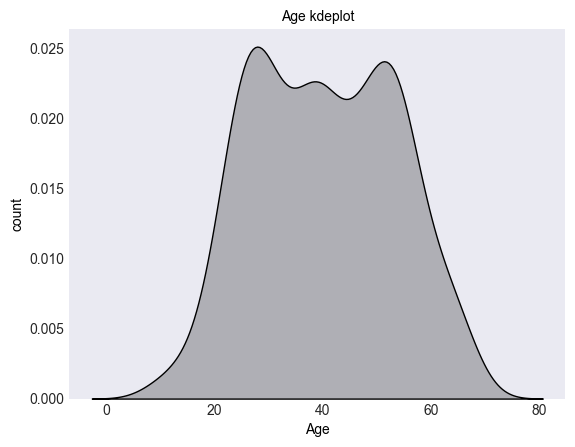

In [34]:
sns.kdeplot(data=df, x="Age",color="black",fill=True)
plt.xlabel("Age", color="black", fontsize=10)
plt.ylabel("count", color="black", fontsize=10)
plt.title("Age kdeplot", color="black",fontsize=10)
plt.show()

# Is there a relationship between age and sleep efficiency?

In [35]:
sns.relplot(
    data=df, kind="line",
    x="Age", y="Sleep_efficiency", style="Gender", color="black"
)
plt.show()

ValueError: Could not interpret value `Sleep_efficiency` for parameter `y`

# We observe that women's sleep efficiency increases in their 50s and men in their 60s.

In [ ]:
df.Gender.value_counts()

Male      228
Female    224
Name: Gender, dtype: int64

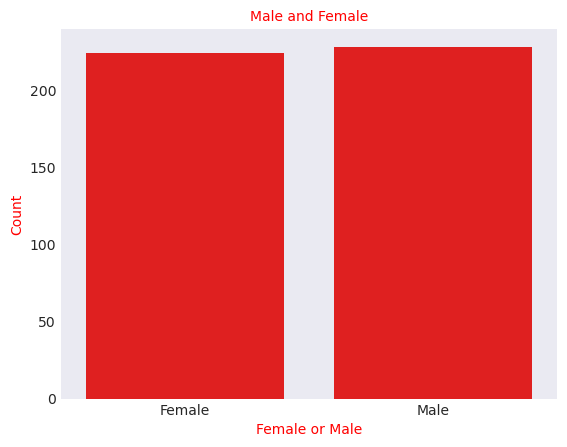

In [ ]:
sns.countplot(data=df,x="Gender", color="red")
plt.xlabel("Female or Male", color="red",fontsize=10)
plt.ylabel("Count", color="red",fontsize=10)
plt.title("Male and Female", color="red",fontsize=10)
plt.show()


In [ ]:
df.Smoking_status.value_counts()

No     291
Yes    161
Name: Smoking_status, dtype: int64

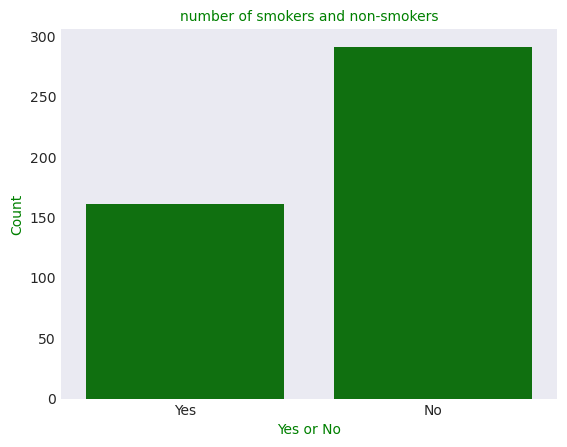

In [ ]:
sns.countplot(data=df,x="Smoking_status", color="green")
plt.xlabel("Yes or No", color="green",fontsize=10)
plt.ylabel("Count", color="green",fontsize=10)
plt.title("number of smokers and non-smokers", color="green",fontsize=10)
plt.show()


# Does smoking affect sleep patterns?

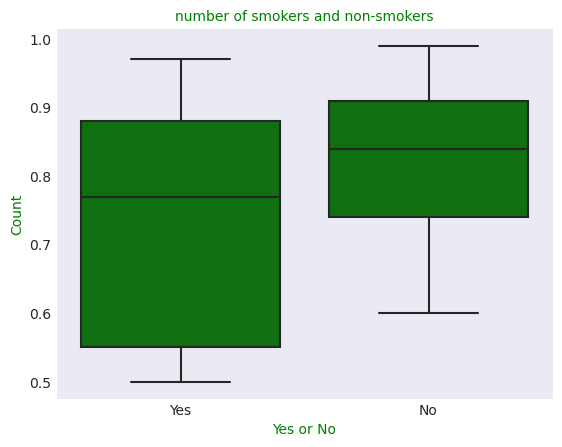

In [ ]:
sns.boxplot(data=df,x="Smoking_status",y="Sleep_efficiency", color="green")
plt.xlabel("Yes or No", color="green",fontsize=10)
plt.ylabel("Count", color="green",fontsize=10)
plt.title("number of smokers and non-smokers", color="green",fontsize=10)
plt.show()

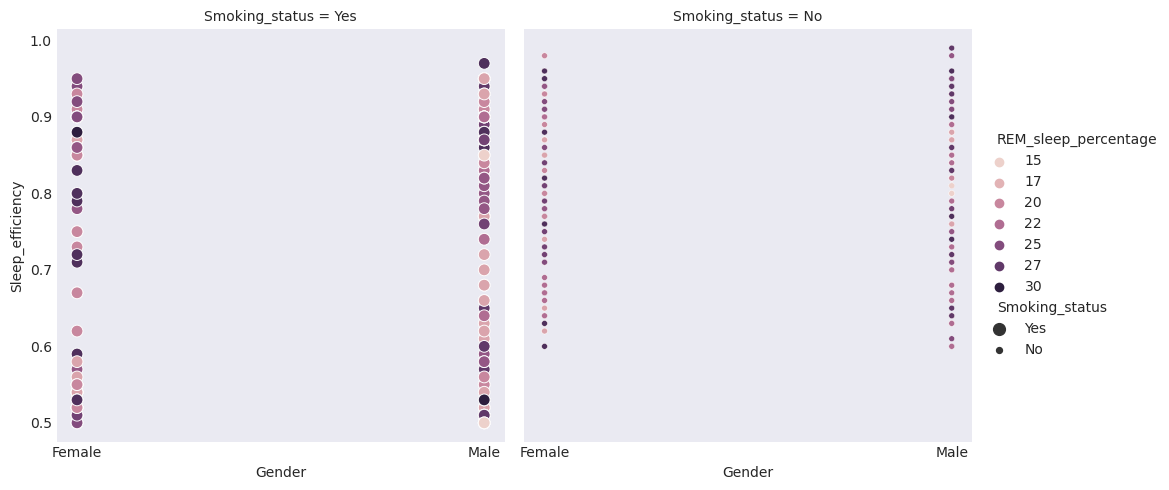

In [ ]:
sns.relplot(
    data=df,
    x="Gender", y="Sleep_efficiency", col="Smoking_status",
    hue="REM_sleep_percentage", size="Smoking_status",
)
plt.show()

# Above is the box plot showing that non-smokers have better sleep quality.

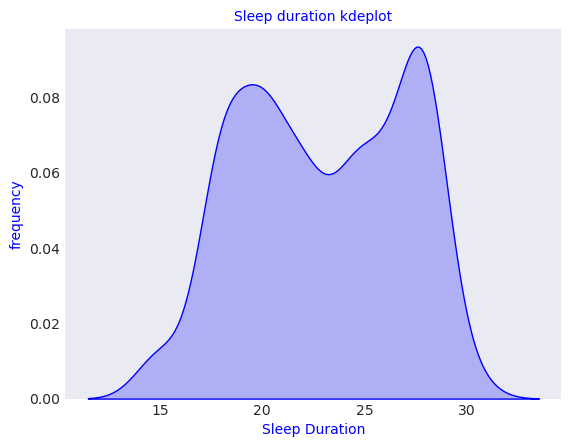

In [ ]:
sns.kdeplot(data=df, x="REM_sleep_percentage",color="blue",fill=True)
plt.xlabel("Sleep Duration", color="blue", fontsize=10)
plt.ylabel("frequency", color="blue", fontsize=10)
plt.title("Sleep duration kdeplot", color="blue",fontsize=10)
plt.show()

In [ ]:

df.Exercise_frequency.value_counts()

3.0    130
0.0    116
1.0     97
2.0     54
4.0     41
5.0      8
Name: Exercise_frequency, dtype: int64

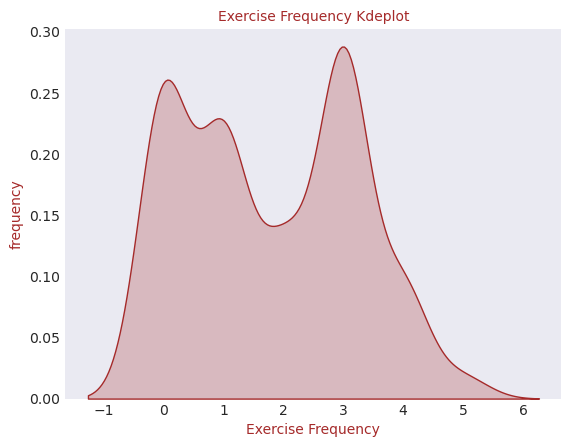

In [ ]:
sns.kdeplot(data=df, x="Exercise_frequency",color="brown",fill=True)
plt.xlabel("Exercise Frequency", color="brown", fontsize=10)
plt.ylabel("frequency", color="brown", fontsize=10)
plt.title("Exercise Frequency Kdeplot", color="brown",fontsize=10)
plt.show()

In [ ]:

df.Alcohol_consumption.value_counts()

0.0    233
1.0     57
3.0     50
2.0     40
5.0     32
4.0     24
Name: Alcohol_consumption, dtype: int64

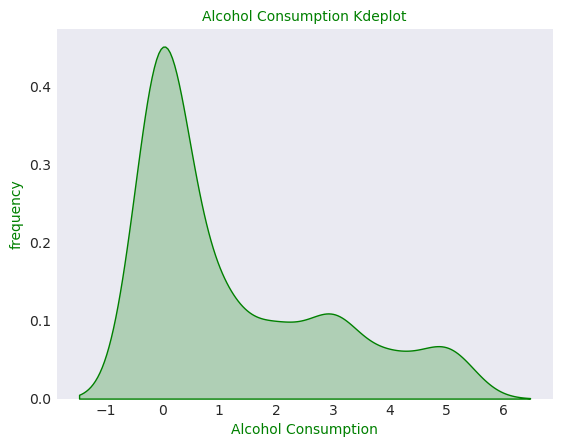

In [ ]:
sns.kdeplot(data=df, x="Alcohol_consumption",color="green",fill=True)
plt.xlabel("Alcohol Consumption", color="green", fontsize=10)
plt.ylabel("frequency", color="green", fontsize=10)
plt.title("Alcohol Consumption Kdeplot", color="green",fontsize=10)
plt.show()

# What is the effect of drinking alcohol on sleep efficiency?

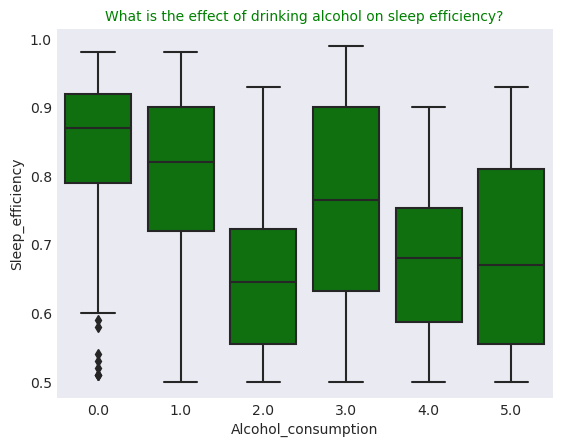

In [ ]:
sns.boxplot(data=df,x="Alcohol_consumption",y="Sleep_efficiency", color="green")
plt.title("What is the effect of drinking alcohol on sleep efficiency?", color="green",fontsize=10)
plt.show()

# Dr. “Alcohol consumption can help you fall asleep, but it greatly reduces the quality of your rest that night,” Robbins says. In particular, alcohol harms REM sleep, which is important for memory and learning.

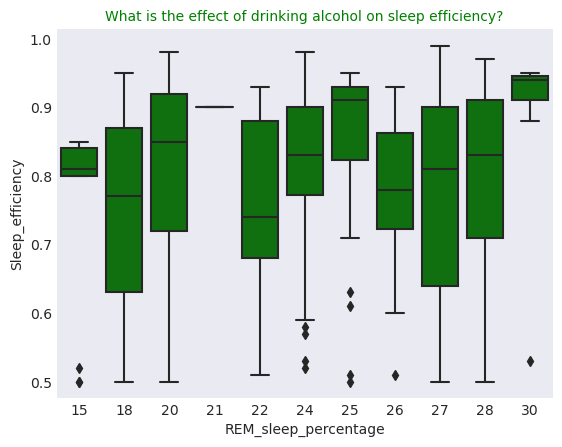

In [ ]:
sns.boxplot(data=df,x="REM_sleep_percentage",y="Sleep_efficiency", color="green")
plt.title("What is the effect of drinking alcohol on sleep efficiency?", color="green",fontsize=10)
plt.show()

In [ ]:
df.Caffeine_consumption.value_counts()

0.0      211
50.0     107
25.0      79
75.0      25
200.0      4
100.0      1
Name: Caffeine_consumption, dtype: int64

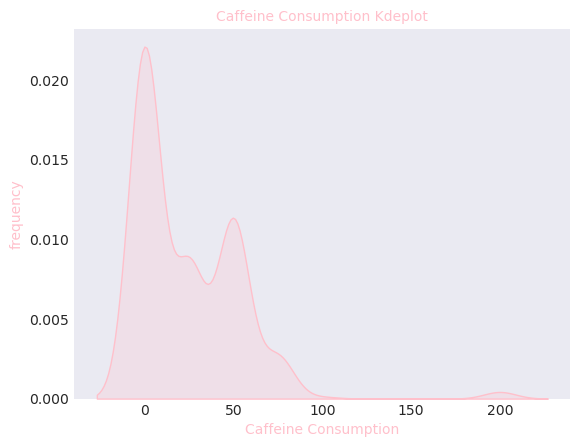

In [ ]:
sns.kdeplot(data=df, x="Caffeine_consumption",color="pink",fill=True)
plt.xlabel("Caffeine Consumption", color="pink", fontsize=10)
plt.ylabel("frequency", color="pink", fontsize=10)
plt.title("Caffeine Consumption Kdeplot", color="pink",fontsize=10)
plt.show()

# Does caffeine consumption affect sleep?

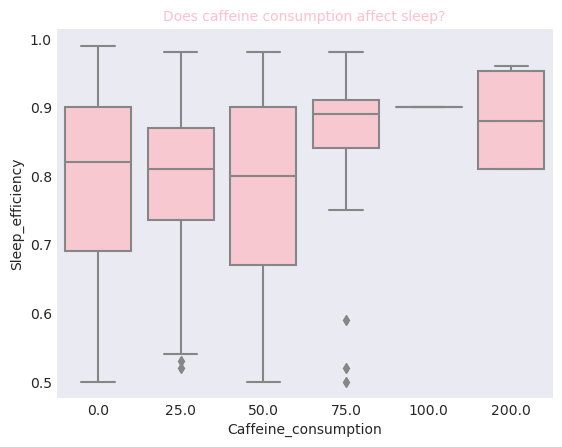

In [ ]:
sns.boxplot(data=df,x="Caffeine_consumption",y="Sleep_efficiency", color="pink")
plt.title("Does caffeine consumption affect sleep?", color="pink",fontsize=10)
plt.show()

# We understand from the graph above that taking caffeine has no effect on sleep efficiency.

In [ ]:
df.Awakenings.value_counts()

1.0    154
0.0     95
3.0     63
4.0     63
2.0     57
Name: Awakenings, dtype: int64

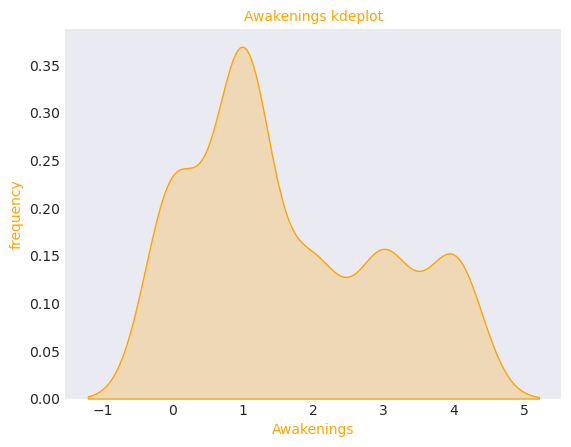

In [ ]:
sns.kdeplot(data=df, x="Awakenings",color="orange",fill=True)
plt.xlabel("Awakenings", color="orange", fontsize=10)
plt.ylabel("frequency", color="orange", fontsize=10)
plt.title("Awakenings kdeplot", color="orange",fontsize=10)
plt.show()

# Usually the number of awakenings is one or 0.

In [ ]:
df.Light_sleep_percentage.value_counts()

17    66
20    64
18    50
10    45
13    41
15    36
45    31
52    20
53    16
55    14
21    14
19    12
54    12
48    11
16     6
22     4
50     4
51     2
56     2
43     1
7      1
Name: Light_sleep_percentage, dtype: int64

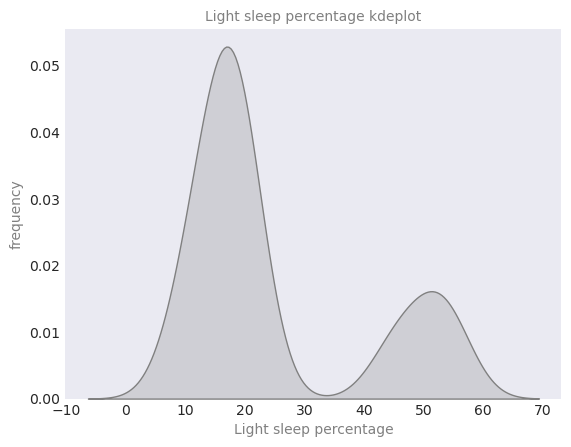

In [ ]:
sns.kdeplot(data=df, x="Light_sleep_percentage",color="gray",fill=True)
plt.xlabel("Light sleep percentage", color="gray", fontsize=10)
plt.ylabel("frequency", color="gray", fontsize=10)
plt.title("Light sleep percentage kdeplot", color="gray",fontsize=10)
plt.show()

In [ ]:
df.Deep_sleep_percentage.value_counts()

60    82
65    60
57    57
55    42
70    41
63    33
35    30
25    22
30    14
20    13
22    13
58    12
23    12
28     7
62     7
75     5
27     1
40     1
Name: Deep_sleep_percentage, dtype: int64

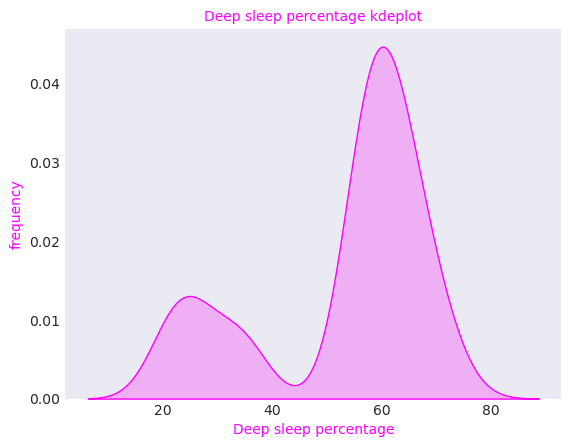

In [ ]:
sns.kdeplot(data=df, x="Deep_sleep_percentage",color="magenta",fill=True)
plt.xlabel("Deep sleep percentage", color="magenta", fontsize=10)
plt.ylabel("frequency", color="magenta", fontsize=10)
plt.title("Deep sleep percentage kdeplot", color="magenta",fontsize=10)
plt.show()

# Does the number of times you wake up while sleeping have an effect on deep sleep?

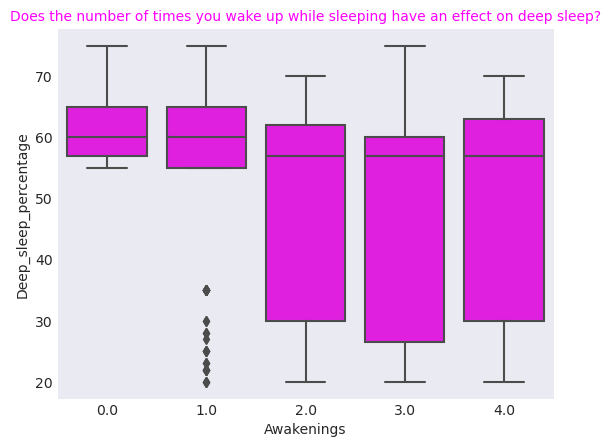

In [ ]:
sns.boxplot(data=df,x="Awakenings",y="Deep_sleep_percentage", color="magenta")
plt.title("Does the number of times you wake up while sleeping have an effect on deep sleep?", color="magenta",fontsize=10)
plt.show()

# In a night, the quality of sleep decreases with each waking up.

In [ ]:
df.REM_sleep_percentage.value_counts()

28    93
18    77
20    77
22    59
24    38
25    34
26    26
27    25
15    15
30     7
21     1
Name: REM_sleep_percentage, dtype: int64

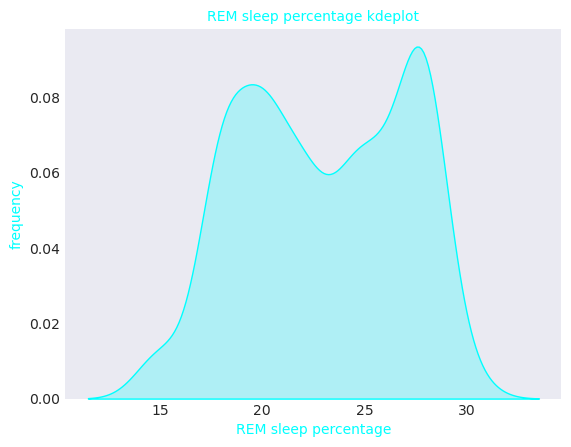

In [ ]:
sns.kdeplot(data=df, x="REM_sleep_percentage",color="cyan",fill=True)
plt.xlabel("REM sleep percentage", color="cyan", fontsize=10)
plt.ylabel("frequency", color="cyan", fontsize=10)
plt.title("REM sleep percentage kdeplot", color="cyan",fontsize=10)
plt.show()

In [ ]:
df.Sleep_efficiency.value_counts()

0.90    29
0.93    22
0.87    22
0.95    21
0.91    19
0.94    18
0.92    13
0.77    13
0.88    13
0.81    12
0.86    12
0.84    12
0.85    12
0.72    12
0.80    11
0.82    11
0.71    11
0.83    10
0.52     9
0.68     9
0.78     9
0.63     9
0.75     8
0.50     8
0.64     8
0.79     8
0.67     8
0.54     8
0.51     8
0.76     7
0.73     7
0.66     7
0.89     7
0.55     7
0.96     7
0.53     6
0.60     6
0.65     4
0.74     4
0.62     4
0.98     4
0.70     3
0.58     3
0.61     2
0.57     2
0.56     2
0.59     2
0.99     1
0.69     1
0.97     1
Name: Sleep_efficiency, dtype: int64

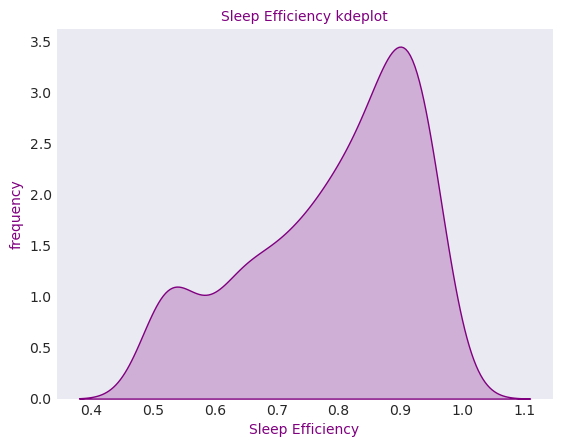

In [ ]:
sns.kdeplot(data=df, x="Sleep_efficiency",color="purple",fill=True)
plt.xlabel("Sleep Efficiency", color="purple", fontsize=10)
plt.ylabel("frequency", color="purple", fontsize=10)
plt.title("Sleep Efficiency kdeplot", color="purple",fontsize=10)
plt.show()

In [ ]:
df.head()

,ID,Age,Gender,Bedtime,Wakeup_time,Sleep_duration,Sleep_efficiency,REM_sleep_percentage,Deep_sleep_percentage,Light_sleep_percentage,Awakenings,Caffeine_consumption,Alcohol_consumption,Smoking_status,Exercise_frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,10,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,24,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,28,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [ ]:
df['Date'] = pd.to_datetime(df['Bedtime'], errors='coerce')
df['day'] = (df['Date']).dt.day
df['month'] = (df['Date']).dt.month
df['year'] = (df['Date']).dt.year
df['hour'] = (df['Date']).dt.hour

In [ ]:
df['year'].value_counts()

2021    452
Name: year, dtype: int64

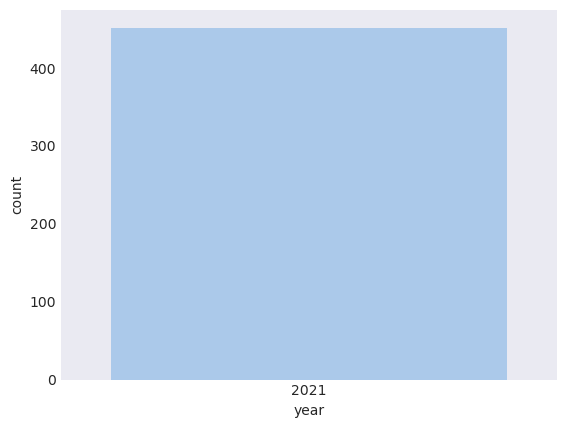

In [ ]:
sns.countplot(data=df, x="year", palette="pastel")
plt.show()

In [ ]:
df['hour'].value_counts()

0     110
22     83
21     73
1      67
2      64
23     55
Name: hour, dtype: int64

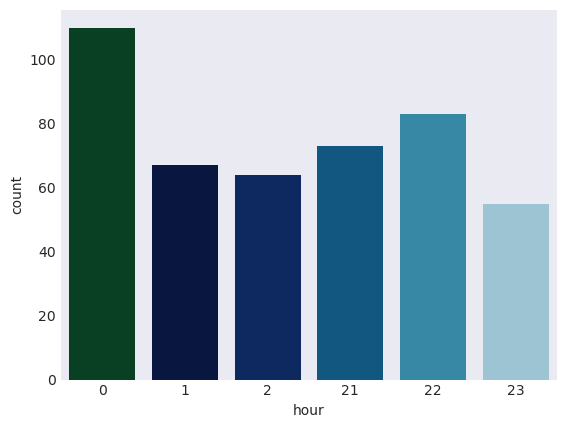

In [ ]:
sns.countplot(data=df, x="hour", palette="ocean")
plt.show()

In [ ]:
fig = px.pie(df, names='hour')
fig.show()

# In general, bedtime is preferred as 12 at night.

In [ ]:

df['Datew'] = pd.to_datetime(df['Wakeup_time'], errors='coerce')
df['dayw'] = (df['Datew']).dt.day
df['monthw'] = (df['Datew']).dt.month
df['yearw'] = (df['Datew']).dt.year
df['hourw'] = (df['Datew']).dt.hour

In [ ]:
df['hourw'].value_counts()

5     80
7     78
9     74
6     64
8     60
4     43
10    35
3     10
11     6
12     2
Name: hourw, dtype: int64

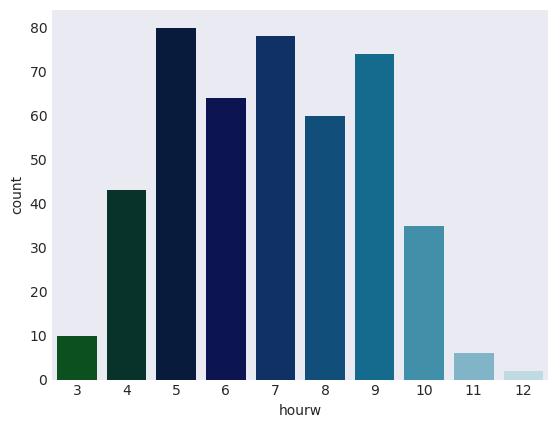

In [ ]:
sns.countplot(data=df, x="hourw", palette="ocean")
plt.show()

In [ ]:
fig = px.pie(df, names='hourw')
fig.show()

# Most wake up at 5 am.

<a id="5"></a>
# <p style="padding:10px;background-color:orange;margin:0;color:black;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">AUTHOR MESSAGE</p>

<span style="color:orange;font-family:serif; font-size:28px;"> 🔵 If you liked this Notebook, please do upvote. If you have any questions, feel free to comment! Best Wishes 🔵 </span>

# <a href="https://www.linkedin.com/in/melike-dilekci-727224204">https://www.linkedin.com/in/melike-dilekci-727224204</a>